array([[760.719501, 847.618641, 744.439154, 840.236948,  10.589615],
       [855.246678, 850.498095, 852.071734, 861.589238,   8.443139],
       [783.282361, 823.265741, 759.913994, 848.095641,  16.363618],
       ...,
       [350.522775, 469.227685, 352.365249, 456.905092,   6.229788],
       [493.872515, 639.374016, 498.42512 , 628.75357 ,   6.302668],
       [781.501396, 991.034053, 782.871866, 970.855463,   7.070384]])

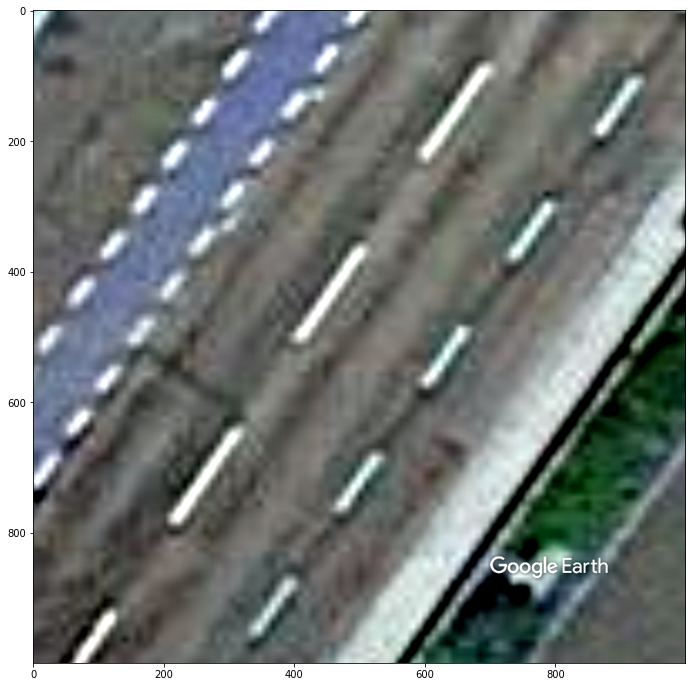

In [7]:
import cv2
import numpy as np
import os
import math
from matplotlib.pyplot import imshow, figure

# Line Segment Detection (LSD) algorithm mentioned in 
#    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5017478/pdf/sensors-16-01313.pdf
# Python library: 
#    https://github.com/AndranikSargsyan/pylsd-nova
from pylsd import lsd


def showimage(img):
    figure(figsize=[12,12])
    imshow(np.asarray(img))
    
# https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

    
paths = ['samples/00182.jpg', 'samples/00214.jpg', 'samples/00315.jpg', 'samples/00426.jpg']

full_name = paths[3] # 'car.jpg'
folder, img_name = os.path.split(full_name)
img = cv2.imread(full_name, cv2.IMREAD_COLOR)
# slightly increase contrast
img = apply_brightness_contrast(img, contrast=32)
# norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
showimage(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

segments = lsd(img_gray, scale=0.5)
segments

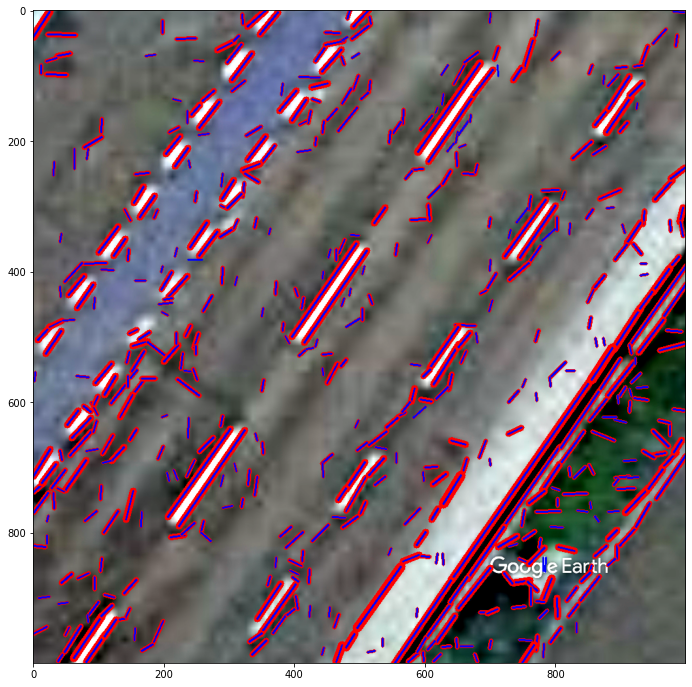

In [8]:
def draw_lines_to_image(img, segments, min_width=None, min_length=None):
    for i in range(segments.shape[0]):
        pt1 = (int(segments[i, 0]), int(segments[i, 1]))
        pt2 = (int(segments[i, 2]), int(segments[i, 3]))
        length = math.sqrt((pt1[0]-pt2[0])*(pt1[0]-pt2[0]) + (pt1[1]-pt2[1])*(pt1[1]-pt2[1]))
        width = segments[i, 4]
        if (min_length is None) or (length 
>= min_length):        
            if (min_width is None) or (width.item() >= min_width):
                cv2.line(img, pt1, pt2, (255, 0, 0), int(np.ceil(width / 2)))
                cv2.line(img, pt1, pt2, (0, 0, 255), 2)

img2 = img.copy()
draw_lines_to_image(img2, segments)
showimage(img2)

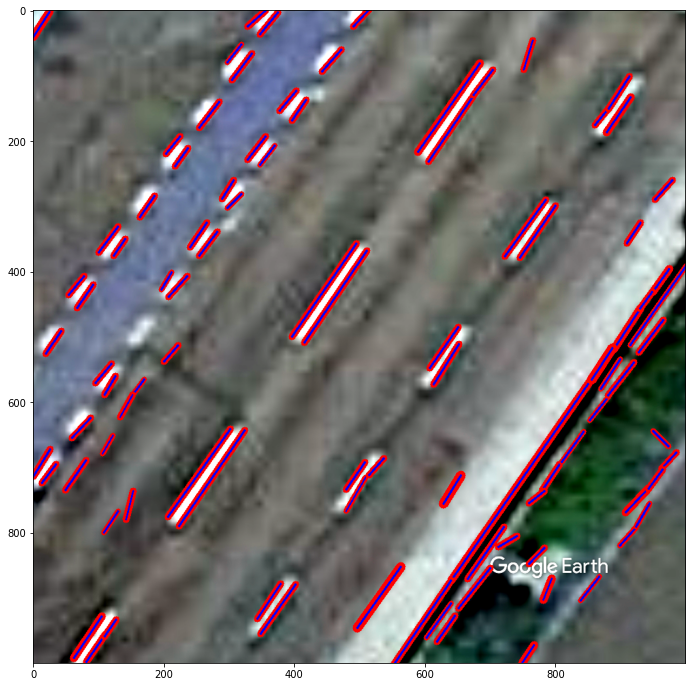

In [9]:
img3 = img.copy()
draw_lines_to_image(img3, segments, min_width=15, min_length=30)
showimage(img3)